In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
import os
import json
import scipy.stats as spst


Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: '/storage/mgymrek/chipmunk/encode/GM12878_SRF_ENCFF387RFR_ENCFF500GHH/GM12878_SRF_ENCFF387RFR_ENCFF500GHH.paired.frags.txt'

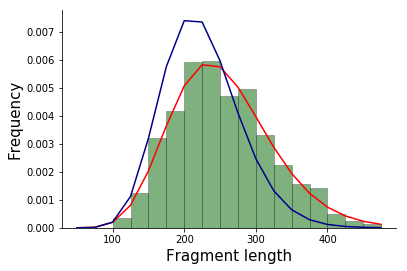

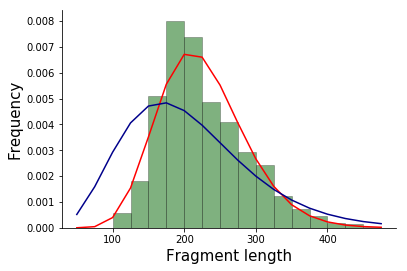

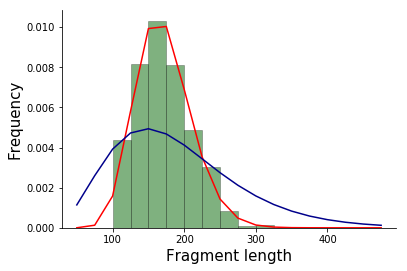

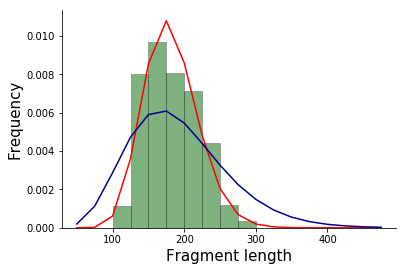

In [7]:
FRAGDIR = "/storage/mgymrek/chipmunk/encode"
FACTORS = ["GM12878_RELB_ENCFF708KIW_ENCFF355VTC", 
          "GM12878_TARDBP_ENCFF673WUM_ENCFF016QUV",
          "GM12878_ZNF24_ENCFF699QHD_ENCFF882PND",
          "GM12878_BACH1_ENCFF518TTP_ENCFF866OLZ", ] # TODO change
# "GM12878_IKZF1_ENCFF216YZE_ENCFF795PEX",
# "GM12878_SRF_ENCFF387RFR_ENCFF500GHH",

for fac in FACTORS:
    frags = [int(item.strip()) for item in open(os.path.join(FRAGDIR, fac, fac+".paired.frags.txt"), "r").readlines()]
    paired_model = json.load(open(os.path.join(FRAGDIR, fac, fac+".paired.json"), "r"))
    single_model = json.load(open(os.path.join(FRAGDIR, fac, fac+".json"), "r"))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    bins = np.arange(50, 500, 25)
    ax.hist(frags, bins=bins, color="darkgreen", edgecolor="black", linewidth=0.5, alpha=0.5, density=True)
    ax.set_xlabel("Fragment length", size=15)
    ax.set_ylabel("Frequency", size=15);
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Plot Gamma fit for paired and single
    ax.plot(bins, spst.gamma(paired_model["frag"]["k"], 0, paired_model["frag"]["theta"]).pdf(bins), color="red")
    ax.plot(bins, spst.gamma(single_model["frag"]["k"], 0, single_model["frag"]["theta"]).pdf(bins), color="darkblue")